# Data Exploration and Validation

In this exercise we will cover how to use Ibis, Pandas, and Pandera to explore, tidy, and validate the data.

### Activity 1 - load data from SQL

#### 🔄 Task

- Use `ibis` to load the data from SQL into a pandas dataframe.

🚨 Only load the first 10,000 rows. This will speed our our ETL and testing.

#### ✅ Solution

In the first exercise we used SQLAlchemy to interact with SQL. Ibis is another Python package for interacting with SQL databases. Ibis is specially designed for analytics workloads.

```bash
python -m pip install 'ibis-framework[postgres]'
```

In [1]:
import os

import ibis

# Set up ibis for reading data
con = ibis.postgres.connect(
    user="posit",
    password=os.environ["CONF23_DB_PASSWORD"],
    host=os.environ["CONF23_DB_HOST"],
    port=5432,
    database="python_workshop"
)

Load the business license data.

In [2]:
business_license_raw = con.table(name="business_license_raw").limit(10_000).to_pandas()
business_license_raw

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1045374-20050816,1606309,56459,1,PAUL COLLURAFICI,TATTOO FACTORY,4408 N BROADWAY,CHICAGO,IL,60640,...,2005-08-16T00:00:00.000,2006-08-15T00:00:00.000,2005-07-22T00:00:00.000,2005-07-25T00:00:00.000,AAI,None,34,41.961998612,-87.655462297,"\n, \n(41.9619986123253, -87.65546229718817)"
1,1045378-20010216,1118018,203578,1,AMBER RAE BORGLIN,AMBER RAE BORLING,1417 W ROSCOE ST APT.2,CHICAGO,IL,60657,...,2001-02-16T00:00:00.000,2002-02-15T00:00:00.000,None,2003-09-11T00:00:00.000,AAI,None,27,41.943296755,-87.664647788,"\n, \n(41.94329675516324, -87.66464778785225)"
2,1045378-20020216,1422900,203578,1,AMBER RAE BORGLIN,AMBER RAE BORLING,1417 W ROSCOE ST APT.2,CHICAGO,IL,60657,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,None,2003-09-11T00:00:00.000,AAI,None,27,41.943296755,-87.664647788,"\n, \n(41.94329675516324, -87.66464778785225)"
3,1045378-20030216,1422901,203578,1,AMBER RAE BORGLIN,AMBER RAE BORLING,1417 W ROSCOE ST APT.2,CHICAGO,IL,60657,...,2003-02-16T00:00:00.000,2004-02-15T00:00:00.000,2003-09-11T00:00:00.000,2003-09-12T00:00:00.000,AAI,None,27,41.943296755,-87.664647788,"\n, \n(41.94329675516324, -87.66464778785225)"
4,1045381-20020816,1251347,6760,1,SOUTH SHORE HOSPITAL CORPORATION,SOUTH SHORE HOSPITAL,8012 S CRANDON AVE 1ST,CHICAGO,IL,60617,...,2002-08-16T00:00:00.000,2003-08-15T00:00:00.000,2002-09-17T00:00:00.000,2002-09-18T00:00:00.000,AAI,None,None,41.749450604,-87.568778624,"\n, \n(41.74945060417943, -87.5687786244394)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1091976-20120116,2126950,57195,3,SOUTHWEST SIGNS INC,SOUTHWEST SIGNS INC,5641 W 63RD ST,CHICAGO,IL,60638,...,2012-01-16T00:00:00.000,2014-01-15T00:00:00.000,2012-01-02T00:00:00.000,2012-01-03T00:00:00.000,AAI,None,None,41.777910167,-87.763343118,"\n, \n(41.77791016727274, -87.76334311793444)"
9996,1091976-20140116,2295990,57195,3,SOUTHWEST SIGNS INC,SOUTHWEST SIGNS INC,5641 W 63RD ST,CHICAGO,IL,60638,...,2014-01-16T00:00:00.000,2016-01-15T00:00:00.000,2014-01-02T00:00:00.000,2014-01-13T00:00:00.000,AAI,None,None,41.777910167,-87.763343118,"\n, \n(41.77791016727274, -87.76334311793444)"
9997,1091976-20160116,2434679,57195,3,SOUTHWEST SIGNS INC,SOUTHWEST SIGNS INC,5641 W 63RD ST,CHICAGO,IL,60638,...,2016-01-16T00:00:00.000,2018-01-15T00:00:00.000,2015-12-23T00:00:00.000,2015-12-24T00:00:00.000,AAI,None,None,41.777910167,-87.763343118,"\n, \n(41.77791016727274, -87.76334311793444)"
9998,1091976-20180116,2566665,57195,3,SOUTHWEST SIGNS INC,SOUTHWEST SIGNS INC,5641 W 63RD ST,CHICAGO,IL,60638,...,2018-01-16T00:00:00.000,2020-01-15T00:00:00.000,2017-12-26T00:00:00.000,2017-12-27T00:00:00.000,AAI,None,None,41.777910167,-87.763343118,"\n, \n(41.77791016727274, -87.76334311793444)"


Load the food inspection data.

In [3]:
food_inspection_raw = con.table(name="food_inspection_raw").limit(10_000).to_pandas()
food_inspection_raw

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,67733,WOLCOTT'S,TROQUET,1992040,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613,2010-01-04T00:00:00.000,License Re-Inspection,Pass,None,41.961605669949854,-87.67596676683779,"(41.961605669949854, -87.67596676683779)"
1,67732,WOLCOTT'S,TROQUET,1992039,Restaurant,Risk 1 (High),1834 W MONTROSE AVE,CHICAGO,IL,60613,2010-01-04T00:00:00.000,License Re-Inspection,Pass,None,41.961605669949854,-87.67596676683779,"(41.961605669949854, -87.67596676683779)"
2,67738,MICHAEL'S ON MAIN CAFE,MICHAEL'S ON MAIN CAFE,2008948,Restaurant,Risk 1 (High),8750 W BRYN WAWR AVE,CHICAGO,IL,60631,2010-01-04T00:00:00.000,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,None,None,None
3,67757,DUNKIN DONUTS/BASKIN-ROBBINS,DUNKIN DONUTS/BASKIN-ROBBINS,1380279,Restaurant,Risk 2 (Medium),100 W RANDOLPH ST,CHICAGO,IL,60601,2010-01-04T00:00:00.000,Tag Removal,Pass,None,41.88458626715456,-87.63101044588599,"(41.88458626715456, -87.63101044588599)"
4,52234,Cafe 608,Cafe 608,2013328,Restaurant,Risk 1 (High),608 W BARRY AVE,CHICAGO,IL,60657,2010-01-04T00:00:00.000,License Re-Inspection,Pass,None,41.938006880423615,-87.6447545707008,"(41.938006880423615, -87.6447545707008)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,325231,SHERATON CHICAGO HOTEL & TOWER,CHI BAR,23317,Restaurant,Risk 1 (High),301 E NORTH WATER ST,CHICAGO,IL,60611,2010-07-22T00:00:00.000,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.88945828010943,-87.62036837642913,"(41.88945828010943, -87.62036837642913)"
9996,277659,THE CONTINENTAL LOUNGE,THE CONTINENTAL LOUNGE,2013501,TAVERN,Risk 3 (Low),2801 W CHICAGO AVE,CHICAGO,IL,60622,2010-07-22T00:00:00.000,License Re-Inspection,Pass,None,41.895543708081156,-87.69676464023073,"(41.895543708081156, -87.69676464023073)"
9997,120526,SAWTOOTH RESTAURANT AND LOUNGE,SAWTOOTH RESTAURANT AND LOUNGE,2014275,Restaurant,Risk 3 (Low),1350 W RANDOLPH ST,CHICAGO,IL,60607,2010-07-22T00:00:00.000,License Re-Inspection,Pass,None,41.88429595787893,-87.66077034614932,"(41.88429595787893, -87.66077034614932)"
9998,277636,FULLERTON RESTAURANT,FULLERTON RESTAURANT,1519077,None,Risk 1 (High),2400 W FULLERTON AVE,CHICAGO,IL,60647,2010-07-22T00:00:00.000,Canvass,Out of Business,None,41.92500993476519,-87.68770475222249,"(41.92500993476519, -87.68770475222249)"


### Activity 2 - Explore the data

#### 🔄 Task

Begin exploring the data. You will want to understand.

- What columns exist in the data?
- How do the two data sets relate to one another?
- What is the type of each column (e.g. string, number, category, date)?
- Which columns could be useful for the model.
- What is the cardinality of categorical data?
- Is all of the data in scope?
- What steps will I need to perform to clean the data?

🚨 We are not performing feature engineering at this stage. But it is a good time to start thinking about what features you can create from the data.

#### ✅ Solution

In [4]:
import pandas as pd

##### Business license data

Distribution of business locations:

<Axes: xlabel='latitude', ylabel='longitude'>

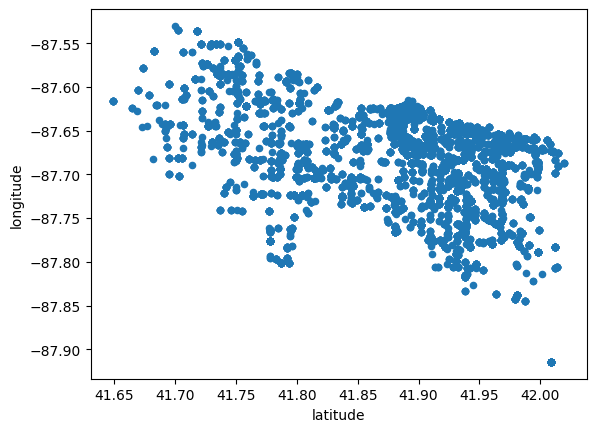

In [5]:
business_license_raw \
    .assign(
        latitude=lambda x: pd.to_numeric(x["latitude"]),
        longitude=lambda x: pd.to_numeric(x["longitude"]),
    ) \
    .plot(x="latitude", y="longitude", kind="scatter")

Most common license types:

In [6]:
business_license_raw \
    .assign(license_code_name=lambda x: x["license_code"] + " - " + x["license_description"]) \
    .loc[:, "license_code_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(50)

1010 - Limited Business License                                 4380
1006 - Retail Food Establishment                                1774
1781 - Tobacco                                                   578
1475 - Consumption on Premises - Incidental Activity             408
1470 - Tavern                                                    275
1012 - Home Occupation                                           261
1011 - Home Repair                                               260
1008 - Hazardous Materials                                       235
1474 - Package Goods                                             226
1009 - Manufacturing Establishments                              200
1569 - Motor Vehicle Repair : Engine Only (Class II)             190
1007 - Wholesale Food Establishment                              141
1525 - Massage Therapist                                         136
1584 - Day Care Center 2 - 6 Years                                75
1003 - Commercial Garage          

Do businesses have multiple licenses?

In [7]:
# Find the most common business
most_common_business = business_license_raw["legal_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(1) \
    .reset_index() \
    .loc[0, "index"]

print(most_common_business)

business_license_raw \
    .loc[business_license_raw["legal_name"] == most_common_business] \
    .sort_values(by="license_id")

HILTON ILLINOIS, LLC


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
5976,1069158-20020216,1216643,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-02-05T00:00:00.000,2002-02-06T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6018,1069163-20020216,1216644,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-02-05T00:00:00.000,2002-02-06T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6116,1069175-20020216,1216645,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-02-05T00:00:00.000,2002-02-06T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6039,1069168-20020216,1216647,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-02-05T00:00:00.000,2002-02-06T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6012,1069162-20020216,1216648,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-02-05T00:00:00.000,2002-02-06T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6097,1069172-20180416,2580430,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2018-04-16T00:00:00.000,2021-07-15T00:00:00.000,2018-04-10T00:00:00.000,2018-04-11T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6065,1069169-20180416,2580431,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2018-04-16T00:00:00.000,2021-07-15T00:00:00.000,2018-04-10T00:00:00.000,2018-04-11T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
6115,1069174-20180416,2580432,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2018-04-16T00:00:00.000,2021-07-15T00:00:00.000,2018-04-10T00:00:00.000,2018-04-11T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"
5988,1069158-20180416,2580433,205144,1,"HILTON ILLINOIS, LLC",Palmer House Hilton,17 E MONROE ST,CHICAGO,IL,60603,...,2018-04-16T00:00:00.000,2021-07-15T00:00:00.000,2018-04-10T00:00:00.000,2018-04-11T00:00:00.000,AAI,None,1,41.880664578,-87.627089364,"\n, \n(41.88066457839605, -87.6270893644417)"


Does each license only one row in the table?

In [8]:
business_license_raw["license_id"].value_counts().sort_values(ascending=False)

1606309    1
1720361    1
2846495    1
1422900    1
1422901    1
          ..
1782304    1
1876650    1
2005760    1
2126950    1
2701100    1
Name: license_id, Length: 10000, dtype: int64

Does all the data relate to Chicago?

In [9]:
business_license_raw["city"].value_counts().sort_values(ascending=False)

CHICAGO            9522
SKOKIE               25
SOUTH HOLLAND        22
EVANSTON             19
GLENVIEW             19
                   ... 
CHICAGO HEIGHTS       1
CHICAGO RIDGE         1
RIVER GROVE           1
BLOOMINGDALE          1
WASHINGTON            1
Name: city, Length: 88, dtype: int64

In [10]:
business_license_raw["state"].value_counts().sort_values(ascending=False)

IL    9928
IN      27
MI      11
IA      11
CO       7
OH       4
MN       3
TX       2
CT       2
NE       1
WA       1
CA       1
MO       1
DC       1
Name: state, dtype: int64

##### Food inspection data 

What are the different risk levels?

<Axes: >

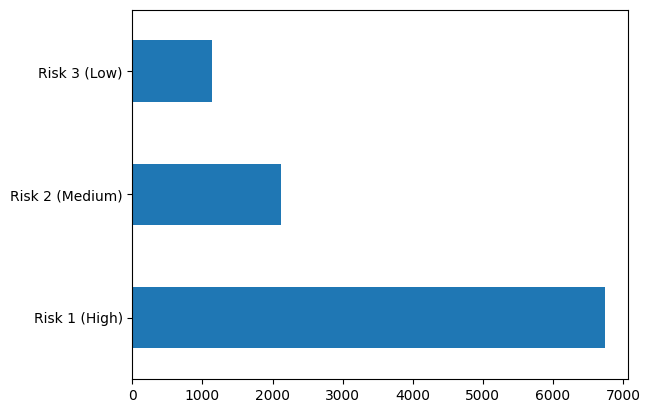

In [11]:
food_inspection_raw["risk"].value_counts().plot(kind="barh")

What are the most common violations?

In [12]:
food_inspection_raw["violations"].value_counts().sort_values(ascending=False)

34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED - Comments: The floors shall be constructed per code, be smooth and easily cleaned, and be kept clean and in good repair.    FOUND FLOORS NOT CLEAN THROUGHOUT.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

What are the most common outcomes?

<Axes: >

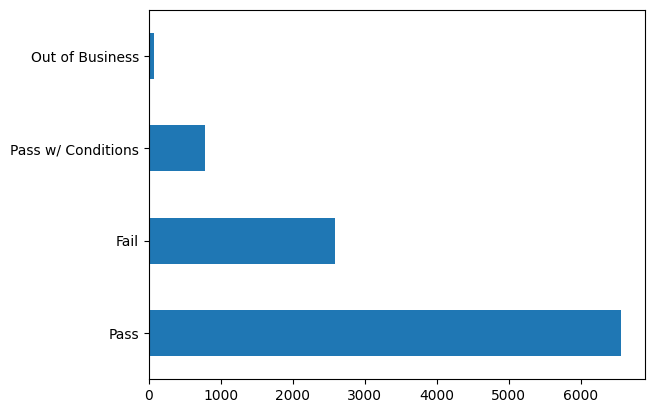

In [13]:
food_inspection_raw["results"].value_counts().plot(kind="barh")

What are the most common facility types?

In [14]:
food_inspection_raw["facility_type"].value_counts().sort_values(ascending=False).head(25)

Restaurant                         5851
Grocery Store                      1349
School                              932
Daycare (2 - 6 Years)               209
Daycare Above and Under 2 Years     149
Long Term Care                      130
Mobile Food Dispenser               129
Bakery                              123
Wholesale                           110
Children's Services Facility         96
Liquor                               66
Daycare Combo 1586                   47
Catering                             41
KIOSK                                32
Daycare (Under 2 Years)              28
Special Event                        23
TAVERN                               22
Hospital                             21
Golden Diner                         20
Navy Pier Kiosk                      14
Shelter                               9
GAS STATION/MINI MART                 7
NURSING HOME                          5
ICE CREAM SHOP                        5
RIVERWALK CAFE                        4


### Activity 3 - Tidy Data

#### 🔄 Task

Now that you have a basic understanding of the data, the next step is to tidy the data. Create a new notebook that:

- Reads in the raw data from the postgres database.
- Tidy's the dataset.

Tips:

- Remove unnecessary rows.
- Remove unnecessary columns.

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.

### Activity 4 - Validate Data (Quick Start)

#### 🔄 Task

In the previous activity we tidied the dataset. For some projects, this may be enough. However, for this project we plan to refresh the data on a regular basis. We would like to gain additional comfort that the data we are using is correct. Data validation can help prove that our data tidying was correct, and find any potential issues if the upstream data changes.

[Pandera](https://pandera.readthedocs.io/en/stable/) is a Python library for validating Pandas dataframes. There are two steps:

1. Define a schema for your data:
   - Define the type for each column
   - Confirm if null values are allowed
   - Define custom checks
2. Run your data through the schema validator.

Take 5 minutes, and work through quick start section of the Pandera Docs: https://pandera.readthedocs.io/en/stable/index.html#quick-start.

#### ✅ Solution

In [15]:
import pandas as pd
import pandera as pa

# data to validate
df = pd.DataFrame({
    "column1": [1, 4, 0, 10, 9],
    "column2": [-1.3, -1.4, -2.9, -10.1, -20.4],
    "column3": ["value_1", "value_2", "value_3", "value_2", "value_1"],
})

# define schema
schema = pa.DataFrameSchema({
    "column1": pa.Column(int, checks=pa.Check.le(10)),
    "column2": pa.Column(float, checks=pa.Check.lt(-1.2)),
    "column3": pa.Column(str, checks=[
        pa.Check.str_startswith("value_"),
        # define custom checks as functions that take a series as input and
        # outputs a boolean or boolean Series
        pa.Check(lambda s: s.str.split("_", expand=True).shape[1] == 2)
    ]),
})

validated_df = schema(df)
print(validated_df)

   column1  column2  column3
0        1     -1.3  value_1
1        4     -1.4  value_2
2        0     -2.9  value_3
3       10    -10.1  value_2
4        9    -20.4  value_1


### Activity 5 - Validate Data (Real Data)

#### 🔄 Task

Now that you understand how Pandera works, lets validate our tidy data! In your notebook where you tidy the data, create Schema to validate both data sets.

Tips:

- Most of the columns have null values.
- Use the `coerce` keyword option to automatically convert columns to the correct type.
- For categorical data, confirm that only the expected categories exist.
- Think about custom checks that you can add to validate the data.

Once your data is validated, write the validated data back to the SQL database.

🚨 Please prefix any tables you create with your name! For example:

- `sam_business_license_validated`
- `sam_food_inspections_validated`

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.